In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.cm as cm

import requests

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
baseURL = 'http://pds-imaging.jpl.nasa.gov/w10n/'
dataURL = 'mer1-m-pancam-2-edr-ops-v1.0/mer1po_0xxx/data/'
product = 'edr'
formatURL = '?output=json'

data = {}
for sol in range(700,900):
    data[sol] = {}

for sol in data.keys():
    URL = '{baseURL}{dataURL}sol{sol}/{product}/'.format(baseURL=baseURL, dataURL=dataURL,
                                                         sol='{0:0>4}'.format(sol), product=product)
    try:
        allimg = requests.get(URL+formatURL).json()
        for img in allimg['leaves']:
            if 'eff' in img['name']:
                seq = img['name'][-13:-7]
                if not seq in data[sol].keys():
                    data[sol][seq] = [img['name']]
                else:
                    data[sol][seq]+=[img['name']]
    except:
        print URL+formatURL


http://pds-imaging.jpl.nasa.gov/w10n/mer1-m-pancam-2-edr-ops-v1.0/mer1po_0xxx/data/sol0768/edr/?output=json


In [11]:
for sol in data.keys():
    print sol
    for seq in data[sol].keys():
        nimg = len(data[sol][seq])
        if nimg>1:
            print seq
            for img in data[sol][seq]:
                print img

700
701
p2437l
1p190430080eff64kcp2437l7m1.img
1p190430113eff64kcp2437l7m1.img
1p190430151eff64kcp2437l7m1.img
1p190430183eff64kcp2437l7m1.img
1p190430215eff64kcp2437l7m1.img
1p190430245eff64kcp2437l7m1.img
1p190430321eff64kcp2437l7m1.img
1p190430598eff64kcp2437l7m1.img
1p190430726eff64kcp2437l7m1.img
1p190430874eff64kcp2437l7m1.img
p2437r
1p190430080eff64kcp2437r1m1.img
1p190430113eff64kcp2437r1m1.img
1p190430151eff64kcp2437r1m1.img
1p190430183eff64kcp2437r1m1.img
1p190430215eff64kcp2437r1m1.img
1p190430245eff64kcp2437r1m1.img
1p190430321eff64kcp2437r1m1.img
1p190430598eff64kcp2437r1m1.img
1p190430726eff64kcp2437r1m1.img
1p190430874eff64kcp2437r1m1.img
702
703
p2763r
1p190591944eff64kcp2763r2m1.img
1p190591972eff64kcp2763r7m1.img
1p190591995eff64kcp2763r2m1.img
1p190592061eff64kcp2763r7m1.img
1p190592138eff64kcp2763r2m1.img
1p190592218eff64kcp2763r7m1.img
1p190595692eff64kcp2763r2m1.img
1p190595729eff64kcp2763r7m1.img
1p190595749eff64kcp2763r2m1.img
1p190595825eff64kcp2763r7m1.img
1p1

1p193079068eff64lqp2537r1m1.img
1p193079088eff64lqp2537r2m1.img
1p193079109eff64lqp2537r3m1.img
1p193079130eff64lqp2537r4m1.img
1p193079155eff64lqp2537r5m1.img
1p193079185eff64lqp2537r6m1.img
1p193079324eff64lqp2537r7m1.img


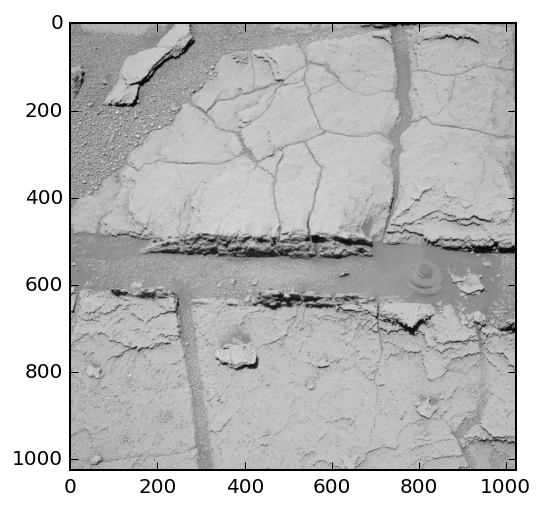

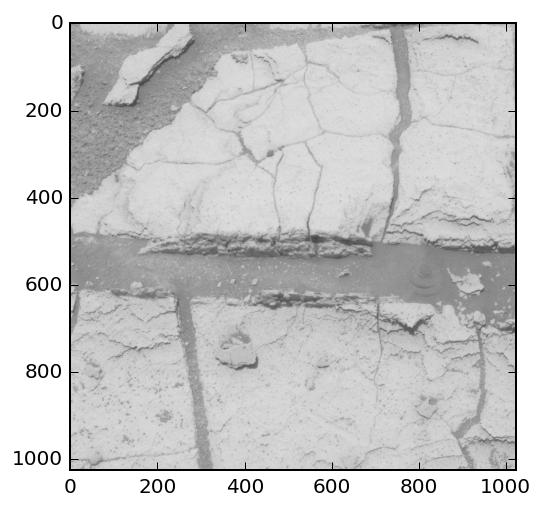

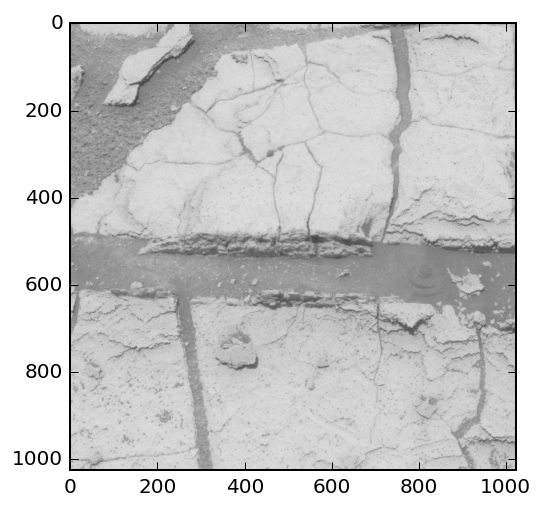

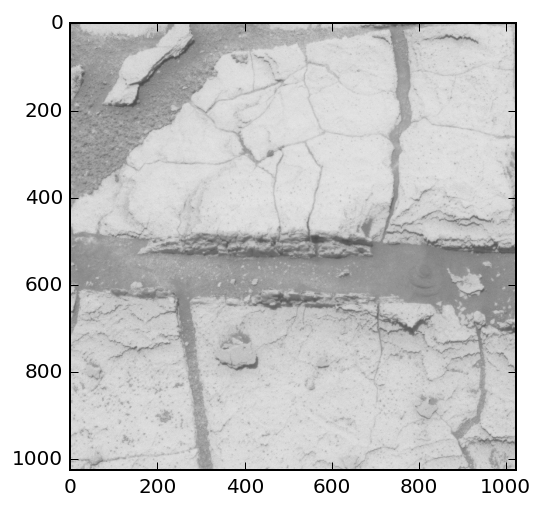

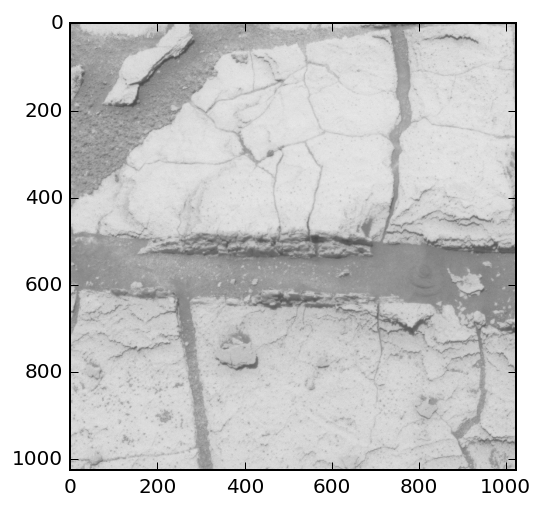

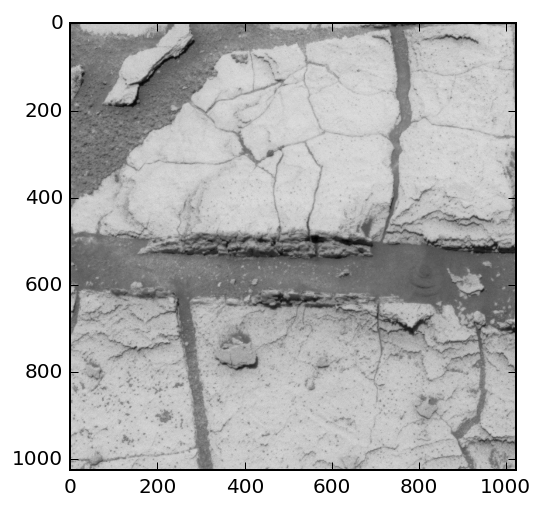

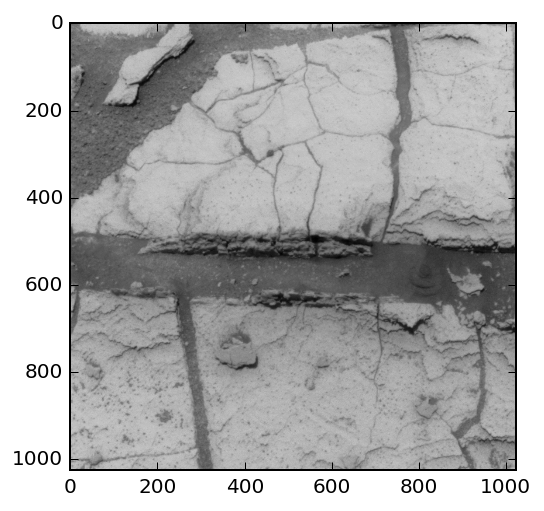

In [17]:
sol = 731
seq = 'p2537r'
imgs = []
for filename in data[sol][seq]:
    print filename
    URL = '{baseURL}{dataURL}sol{sol}/{product}/{filename}/0/raster/data[]{formatURL}'.format(baseURL=baseURL,
            dataURL=dataURL, sol='{0:0>4}'.format(sol), product=product, filename=filename, formatURL=formatURL)
    #print URL
    try:
        plt.figure()
        img = requests.get(URL).json()['data']
        #print np.array(img).shape()
        plt.imshow(img,cmap = cm.Greys_r)
        imgs+=[img]
    except:
        print URL


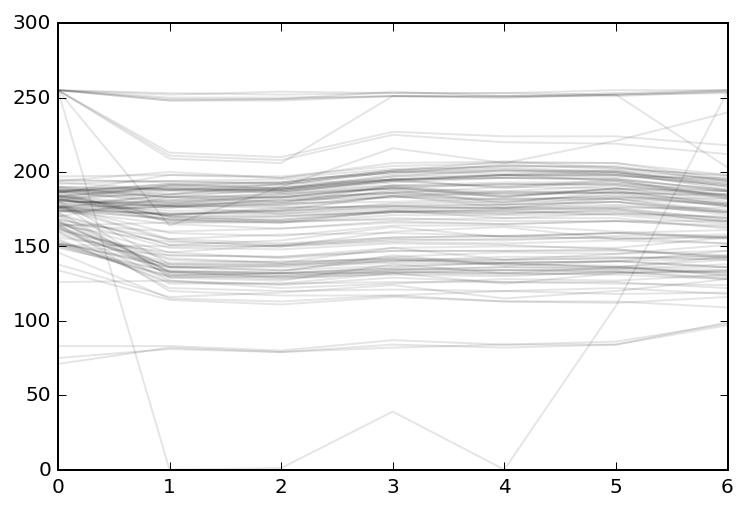

In [18]:
plt.figure()
for i in np.arange(0,np.shape(np.array(imgs)[0])[0],100):
    for j in np.arange(0,np.shape(np.array(imgs)[0])[1],100):
        plt.plot(np.array(imgs)[:,i,j],color='k',alpha=0.1)

In [27]:
all_samples = np.array(imgs)
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)


('Mean Vector:\n', array([[ 173.02789402],
       [ 163.31892014],
       [ 163.06864643]]))


In [38]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    print i
    #scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
#print('Scatter Matrix:\n', scatter_matrix)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27